# Descubra as melhores notas de matemática do ENEM 2016

Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.

### Detalhes
O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e IN_TREINEIRO.

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

## Importando Dataset de treino e teste

In [74]:
filePath = r"C:\Users\MVI_R\OneDrive\Documentos\VSCode\Codenation_Projects\Semana_9\train.csv"
dftrain = pd.read_csv(filePath, delimiter=",", encoding="UTF8")

filePath = r"C:\Users\MVI_R\OneDrive\Documentos\VSCode\Codenation_Projects\Semana_9\test.csv"
dftest = pd.read_csv(filePath, delimiter=",", encoding="UTF8")

## Data Wrangling

In [75]:
# Seleciona apenas colunas de treino que estão disponíveis no teste
columnsdftest = list(dftest.columns)
columnsdftest.append('IN_TREINEIRO')
dftrain = dftrain[columnsdftest]

# Preparada Dataset de resultado
dfresult = pd.DataFrame()
dfresult['NU_INSCRICAO'] = dftest['NU_INSCRICAO']

## EDA Level 1

<ol>
<li>Colunas que possuem o prefixo "IN" são binárias.</li>
<li>Coluna IN_CEGUEIRA não tem valor diferente de 0.</li>
<li>Colunas SG_UF_Residencia,TP_Sexo são categoricas.</li>
<li>Colunas Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047 são do categorias, referente a notas de A a H.</li>
<li>Coluna NU_Incricao é o identificador, do tipo alfanumérico.</li>
<li>Colunas com prefixo CO são códigos alfanuméricos.</li>
</ol>

In [7]:
dftrain.shape

(13730, 44)

In [8]:
dftrain.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'IN_TREINEIRO'],
      dtype='object')

In [67]:
dftrain.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

In [9]:
dftrain.describe()

CO_UF_RESIDENCIA      NU_IDADE   TP_COR_RACA  TP_NACIONALIDADE  \
count      13730.000000  13730.000000  13730.000000      13730.000000   
mean          30.736708     21.593809      2.185652          1.048871   
std            9.862405      7.043654      1.007285          0.258895   
min           11.000000     13.000000      0.000000          0.000000   
25%           23.000000     17.000000      1.000000          1.000000   
50%           31.000000     19.000000      3.000000          1.000000   
75%           35.000000     23.000000      3.000000          1.000000   
max           53.000000     67.000000      5.000000          4.000000   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU     TP_ESCOLA    TP_ENSINO  \
count     13730.000000     13730.000000  13730.000000  4282.000000   
mean          1.782666         2.146176      1.353532     1.178888   
std           0.880734         3.217328      0.558472     0.565490   
min           1.000000         0.000000      1.000000     1.000000   
25%           1.000000         0.000000      1.000000     1.000000   
50%           2.000000         0.000000      1.000000     1.000000   
75%           2.000000         3.000000      2.000000     1.000000   
max           4.000000        10.000000      4.000000     3.000000   

       TP_DEPENDENCIA_ADM_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA     IN_SURDEZ  \
count             4282.000000    13730.000000      13730.0  13730.000000   
mean                 2.259692        0.001238          0.0      0.000364   
std                  0.698586        0.035167          0.0      0.019080   
min                  1.000000        0.000000          0.0      0.000000   
25%                  2.000000        0.000000          0.0      0.000000   
50%                  2.000000        0.000000          0.0      0.000000   
75%                  2.000000        0.000000          0.0      0.000000   
max                  4.000000        1.000000          0.0      1.000000   

        IN_DISLEXIA  IN_DISCALCULIA  IN_SABATISTA   IN_GESTANTE      IN_IDOSO  \
count  13730.000000    13730.000000  13730.000000  13730.000000  13730.000000   
mean       0.000073        0.000073      0.009687      0.000947      0.000146   
std        0.008534        0.008534      0.097947      0.030757      0.012069   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        0.000000        0.000000      0.000000      0.000000      0.000000   
50%        0.000000        0.000000      0.000000      0.000000      0.000000   
75%        0.000000        0.000000      0.000000      0.000000      0.000000   
max        1.000000        1.000000      1.000000      1.000000      1.000000   

       TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
count    13730.000000    13730.000000    13730.000000    13730.000000   
mean         0.754479        0.754479        0.738747        0.738747   
std          0.431932        0.431932        0.440162        0.440162   
min          0.000000        0.000000        0.000000        0.000000   
25%          1.000000        1.000000        0.000000        0.000000   
50%          1.000000        1.000000        1.000000        1.000000   
75%          1.000000        1.000000        1.000000        1.000000   
max          2.000000        2.000000        2.000000        2.000000   

         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC     TP_LINGUA  \
count  10341.000000  10341.000000  10133.000000  13730.000000   
mean     473.495155    529.661087    516.472841      0.593664   
std       71.093674     73.726344     68.688190      0.491167   
min        0.000000      0.000000      0.000000      0.000000   
25%      419.900000    480.400000    468.100000      0.000000   
50%      459.800000    532.000000    520.900000      1.000000   
75%      514.500000    581.200000    564.900000      1.000000   
max      806.400000    807.000000    763.600000      1.000000   

       TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_

In [10]:
dftrain.head(5)

NU_INSCRICAO  CO_UF_RESIDENCIA  \
0  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                43   
1  2c3acac4b33ec2b195d77e7c04a2d75727fad723                23   
2  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                23   
3  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                33   
4  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                13   

  SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  TP_NACIONALIDADE  \
0               RS        24       M            1                 1   
1               CE        17       F            3                 1   
2               CE        21       F            3                 1   
3               RJ        25       F            0                 1   
4               AM        28       M            2                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  \
0                1                4          1        NaN   
1                2                0          2        1.0   
2                3                0          1        NaN   
3                1                9          1        NaN   
4                1                4          1        NaN   

   TP_DEPENDENCIA_ADM_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  \
0                     NaN               0            0          0   
1                     2.0               0            0          0   
2                     NaN               0            0          0   
3                     NaN               0            0          0   
4                     NaN               0            0          0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_SABATISTA  IN_GESTANTE  IN_IDOSO  \
0            0               0             0            0         0   
1            0               0             0            0         0   
2            0               0             0            0         0   
3            0               0             0            0         0   
4            0               0             0            0         0   

   TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  \
0               1               1               1               1       436.3   
1               1               1               1               1       474.5   
2               0               0               0               0         NaN   
3               0               0               0               0         NaN   
4               0               0               0               0         NaN   

   NU_NOTA_CH  NU_NOTA_LC  TP_LINGUA  TP_STATUS_REDACAO  NU_NOTA_COMP1  \
0       495.4       581.2          1                1.0          120.0   
1       544.1       599.0          1                1.0          140.0   
2         NaN         NaN          1                NaN            NaN   
3         NaN         NaN          0                NaN            NaN   
4         NaN         NaN          1                NaN            NaN   

   NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
0          120.0          120.0           80.0           80.0   
1          120.0          120.0          120.0           80.0   
2            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN   

   NU_NOTA_REDACAO Q001 Q002 Q006 Q024 Q025 Q026 Q027 Q047  IN_TREINEIRO  
0            520.0    D    D    C    A    A    C    H    A             0  
1            580.0    A    A    B    A    A    A  NaN    A             0  
2              NaN    D    D    C    A    A    A  NaN    A             0  
3              NaN    H    E    E    C    B    C    F    D             0  
4              NaN    E    D    C    A    A    B    F    A             0

## Data Quality 

In [58]:
dftrain.isna().sum()

NU_INSCRICAO              0
CO_UF_RESIDENCIA          0
SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
TP_DEPENDENCIA_ADM_ESC    0
IN_BAIXA_VISAO            0
IN_SURDEZ                 0
IN_DISLEXIA               0
IN_DISCALCULIA            0
IN_SABATISTA              0
IN_GESTANTE               0
IN_IDOSO                  0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
Q001                      0
Q002                

In [76]:
def DataQualityFunction(dataSet,features_list):
  dataSet.drop(columns=['IN_CEGUEIRA'],inplace=True)

  #Converter prefixo IN como binário
  for item in dataSet.columns:
    if item[0:3] == "IN_":
      dataSet[item] = dataSet[item].astype(bool)

  #Converter para float
  dataSet['TP_ENSINO'] = dataSet['TP_ENSINO'].astype(float)
  dataSet['TP_DEPENDENCIA_ADM_ESC'] = dataSet['TP_DEPENDENCIA_ADM_ESC'].astype(float)
  dataSet['NU_IDADE'] = dataSet['NU_IDADE'].astype(float)
  dataSet['TP_ST_CONCLUSAO'] = dataSet['TP_ST_CONCLUSAO'].astype(float)
  dataSet['TP_ANO_CONCLUIU'] = dataSet['TP_ANO_CONCLUIU'].astype(float)
  dataSet['TP_ESCOLA'] = dataSet['TP_ESCOLA'].astype(float)

  #Questões não respondidas atruido valor Z
  dataSet['Q027'].fillna('Z', inplace=True)   

  #Preenchimento das notas NA com 0
  dataSet.fillna(0, inplace=True)

  #Preenchimento das notas NA com 0
  dataSet[features_list].fillna(0, inplace=True)
  return dataSet

## EDA Level 2

In [77]:
def EDA_Codenation (dataSet):
  sns.set(style="whitegrid")

  # the histogram of the data
  fig, ax = plt.subplots(figsize= (16, 5))
  ax = sns.distplot(dataSet.IN_TREINEIRO,ax=ax)

  # Boxplot (Seaborn)
  plt.figure(figsize=(16, 5))
  ax = sns.boxplot(x=dataSet["IN_TREINEIRO"],width=20)

  #matriz de correlação
  plt.figure(figsize=(40, 30))
  corrMatrix = dataSet.corr()
  sns.heatmap(corrMatrix, annot=True)
  plt.show()


  #subplot
  fig, ax = plt.subplots(math.ceil(len(dftrain.select_dtypes(include=['float64','int64']).columns) /3 ), 3, figsize = (40, 50))
  fig.tight_layout()
  column =0
  row =0
  for item in dftrain.select_dtypes(include=['float64','int64']).columns:
    sns.distplot(dataSet[item],ax = ax[row, column])
    column+=1
    if column == 3:
        column = 0
        row+=1

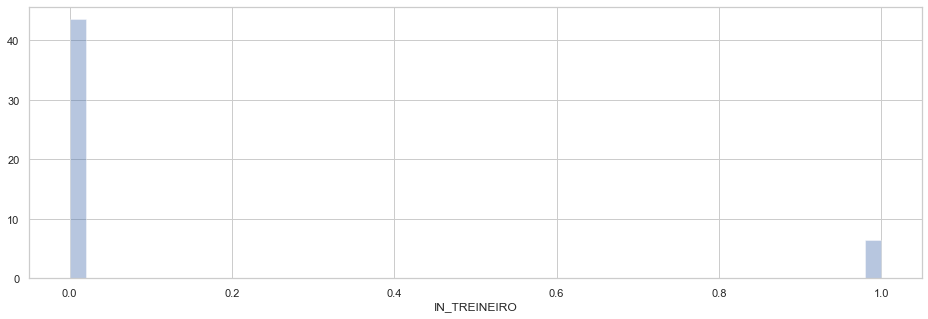

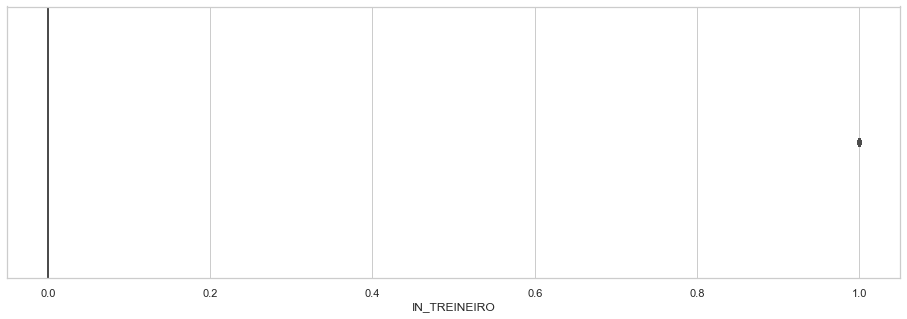

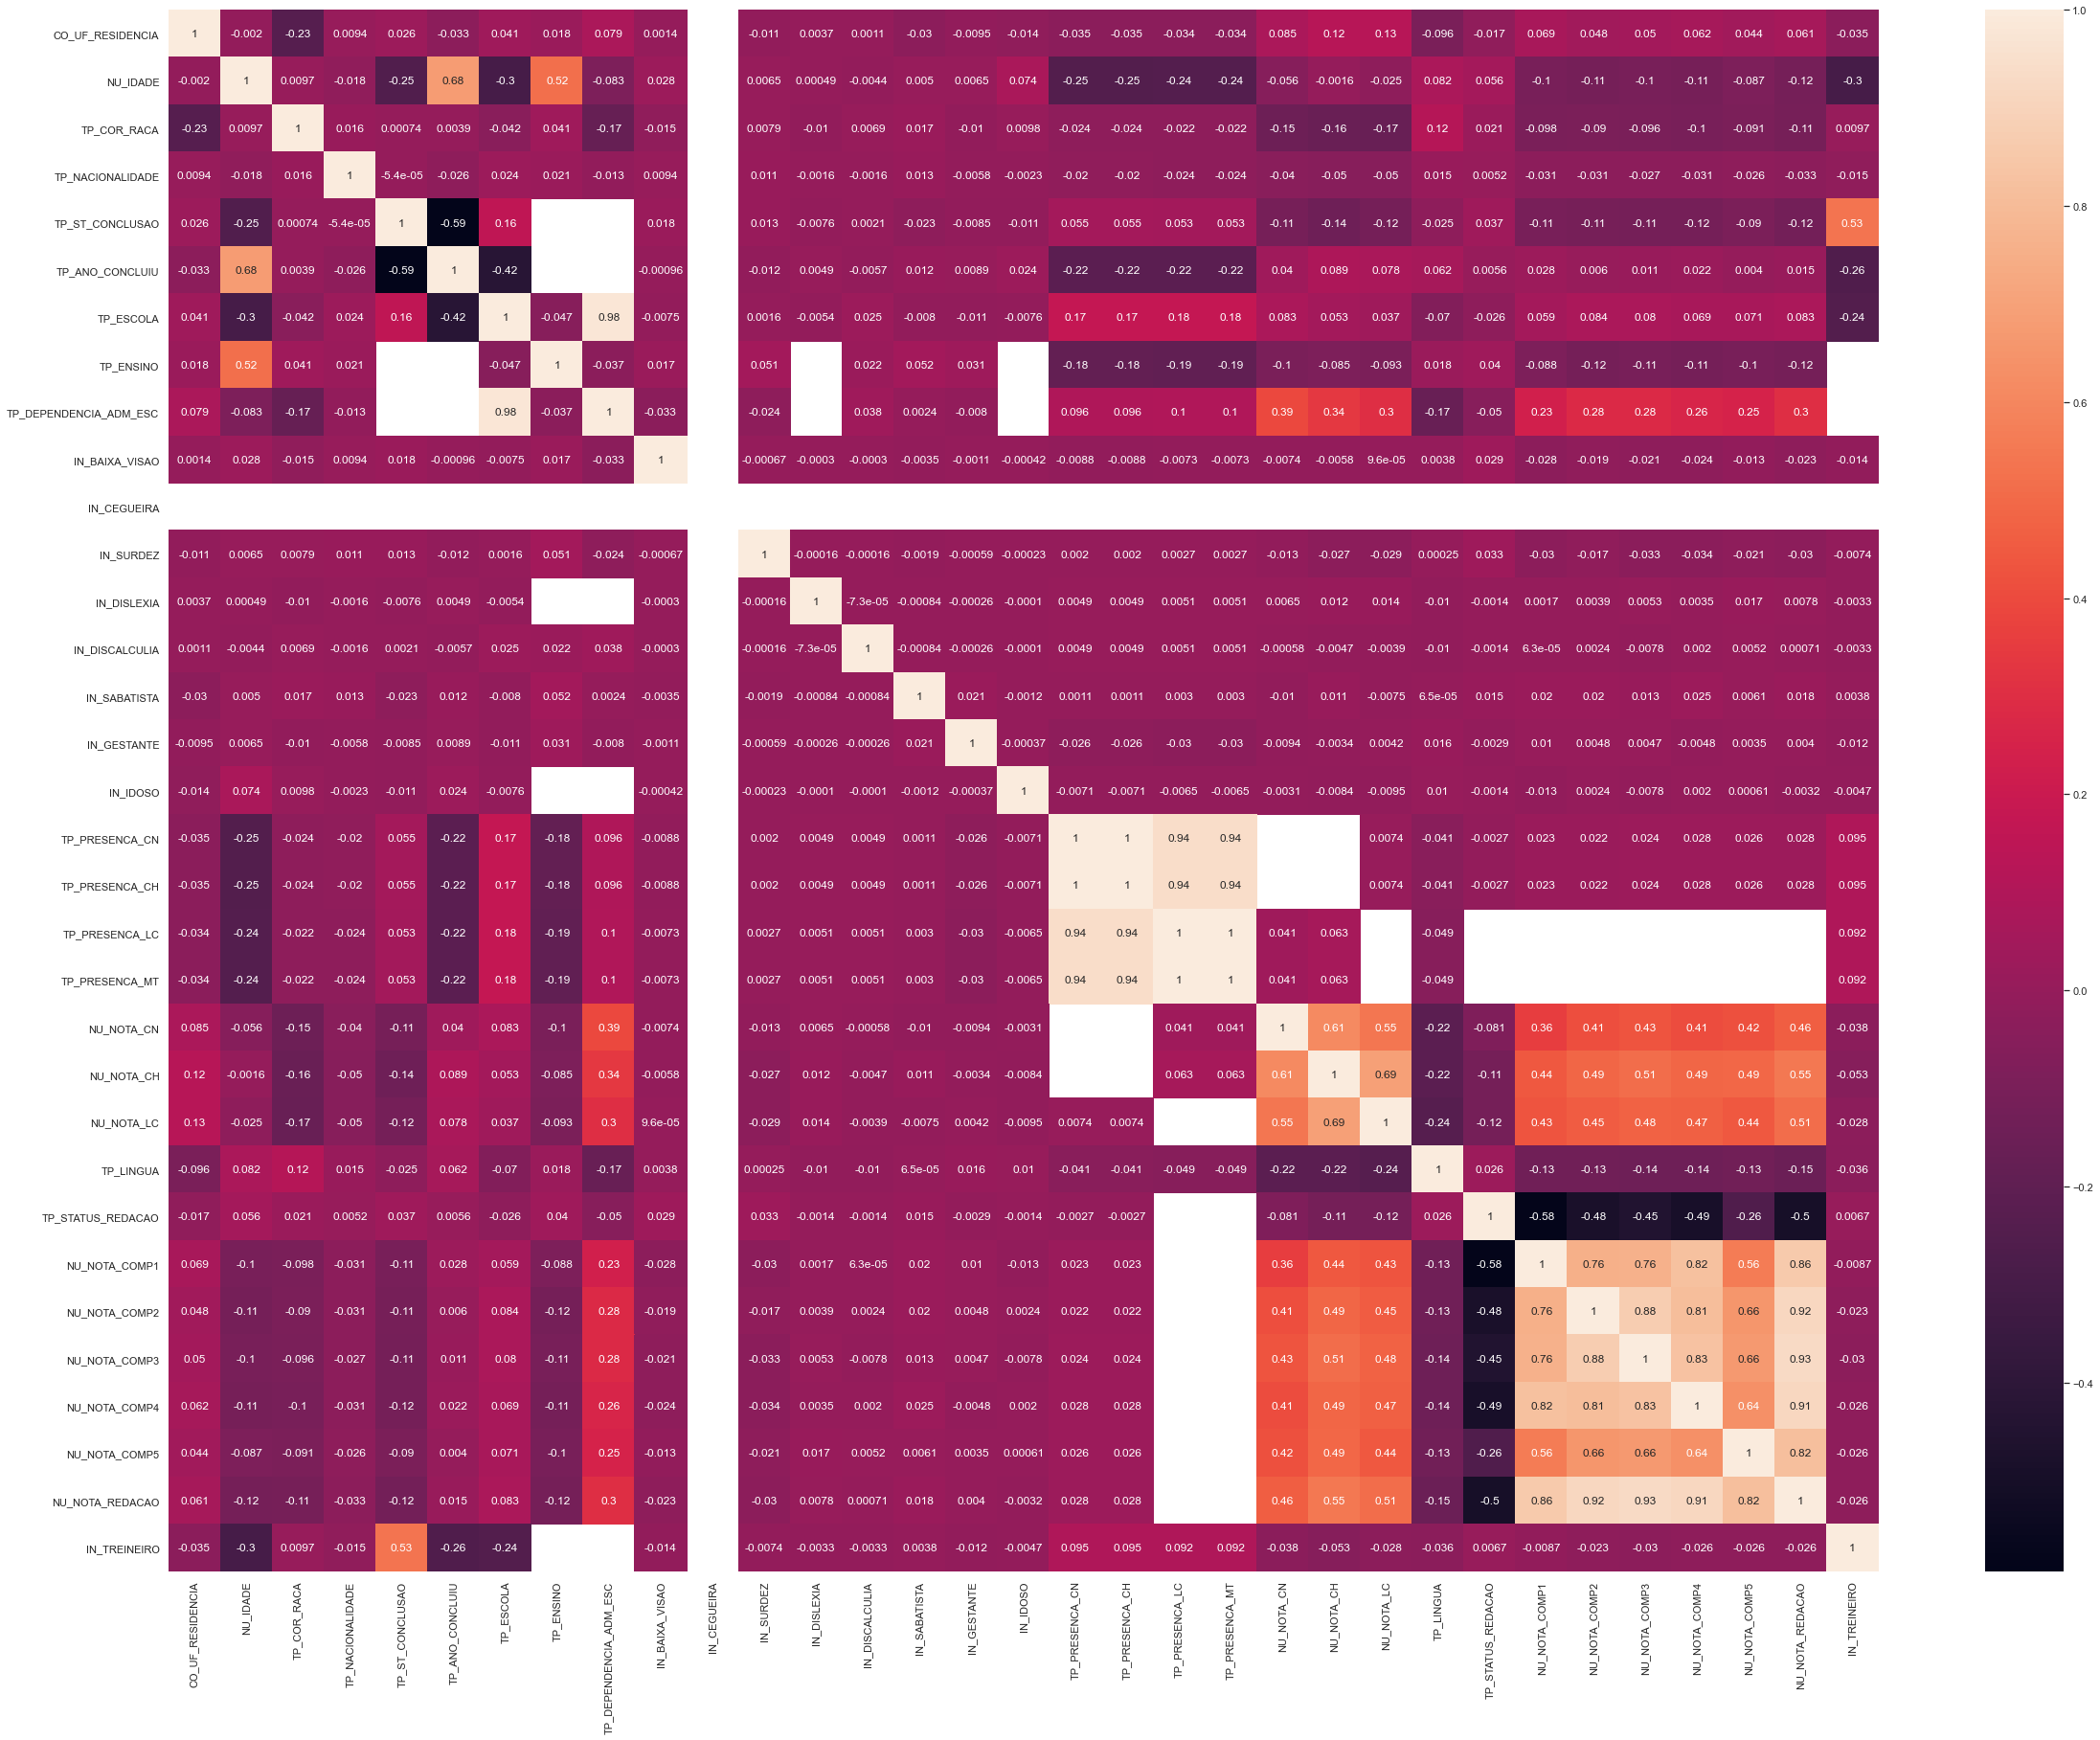

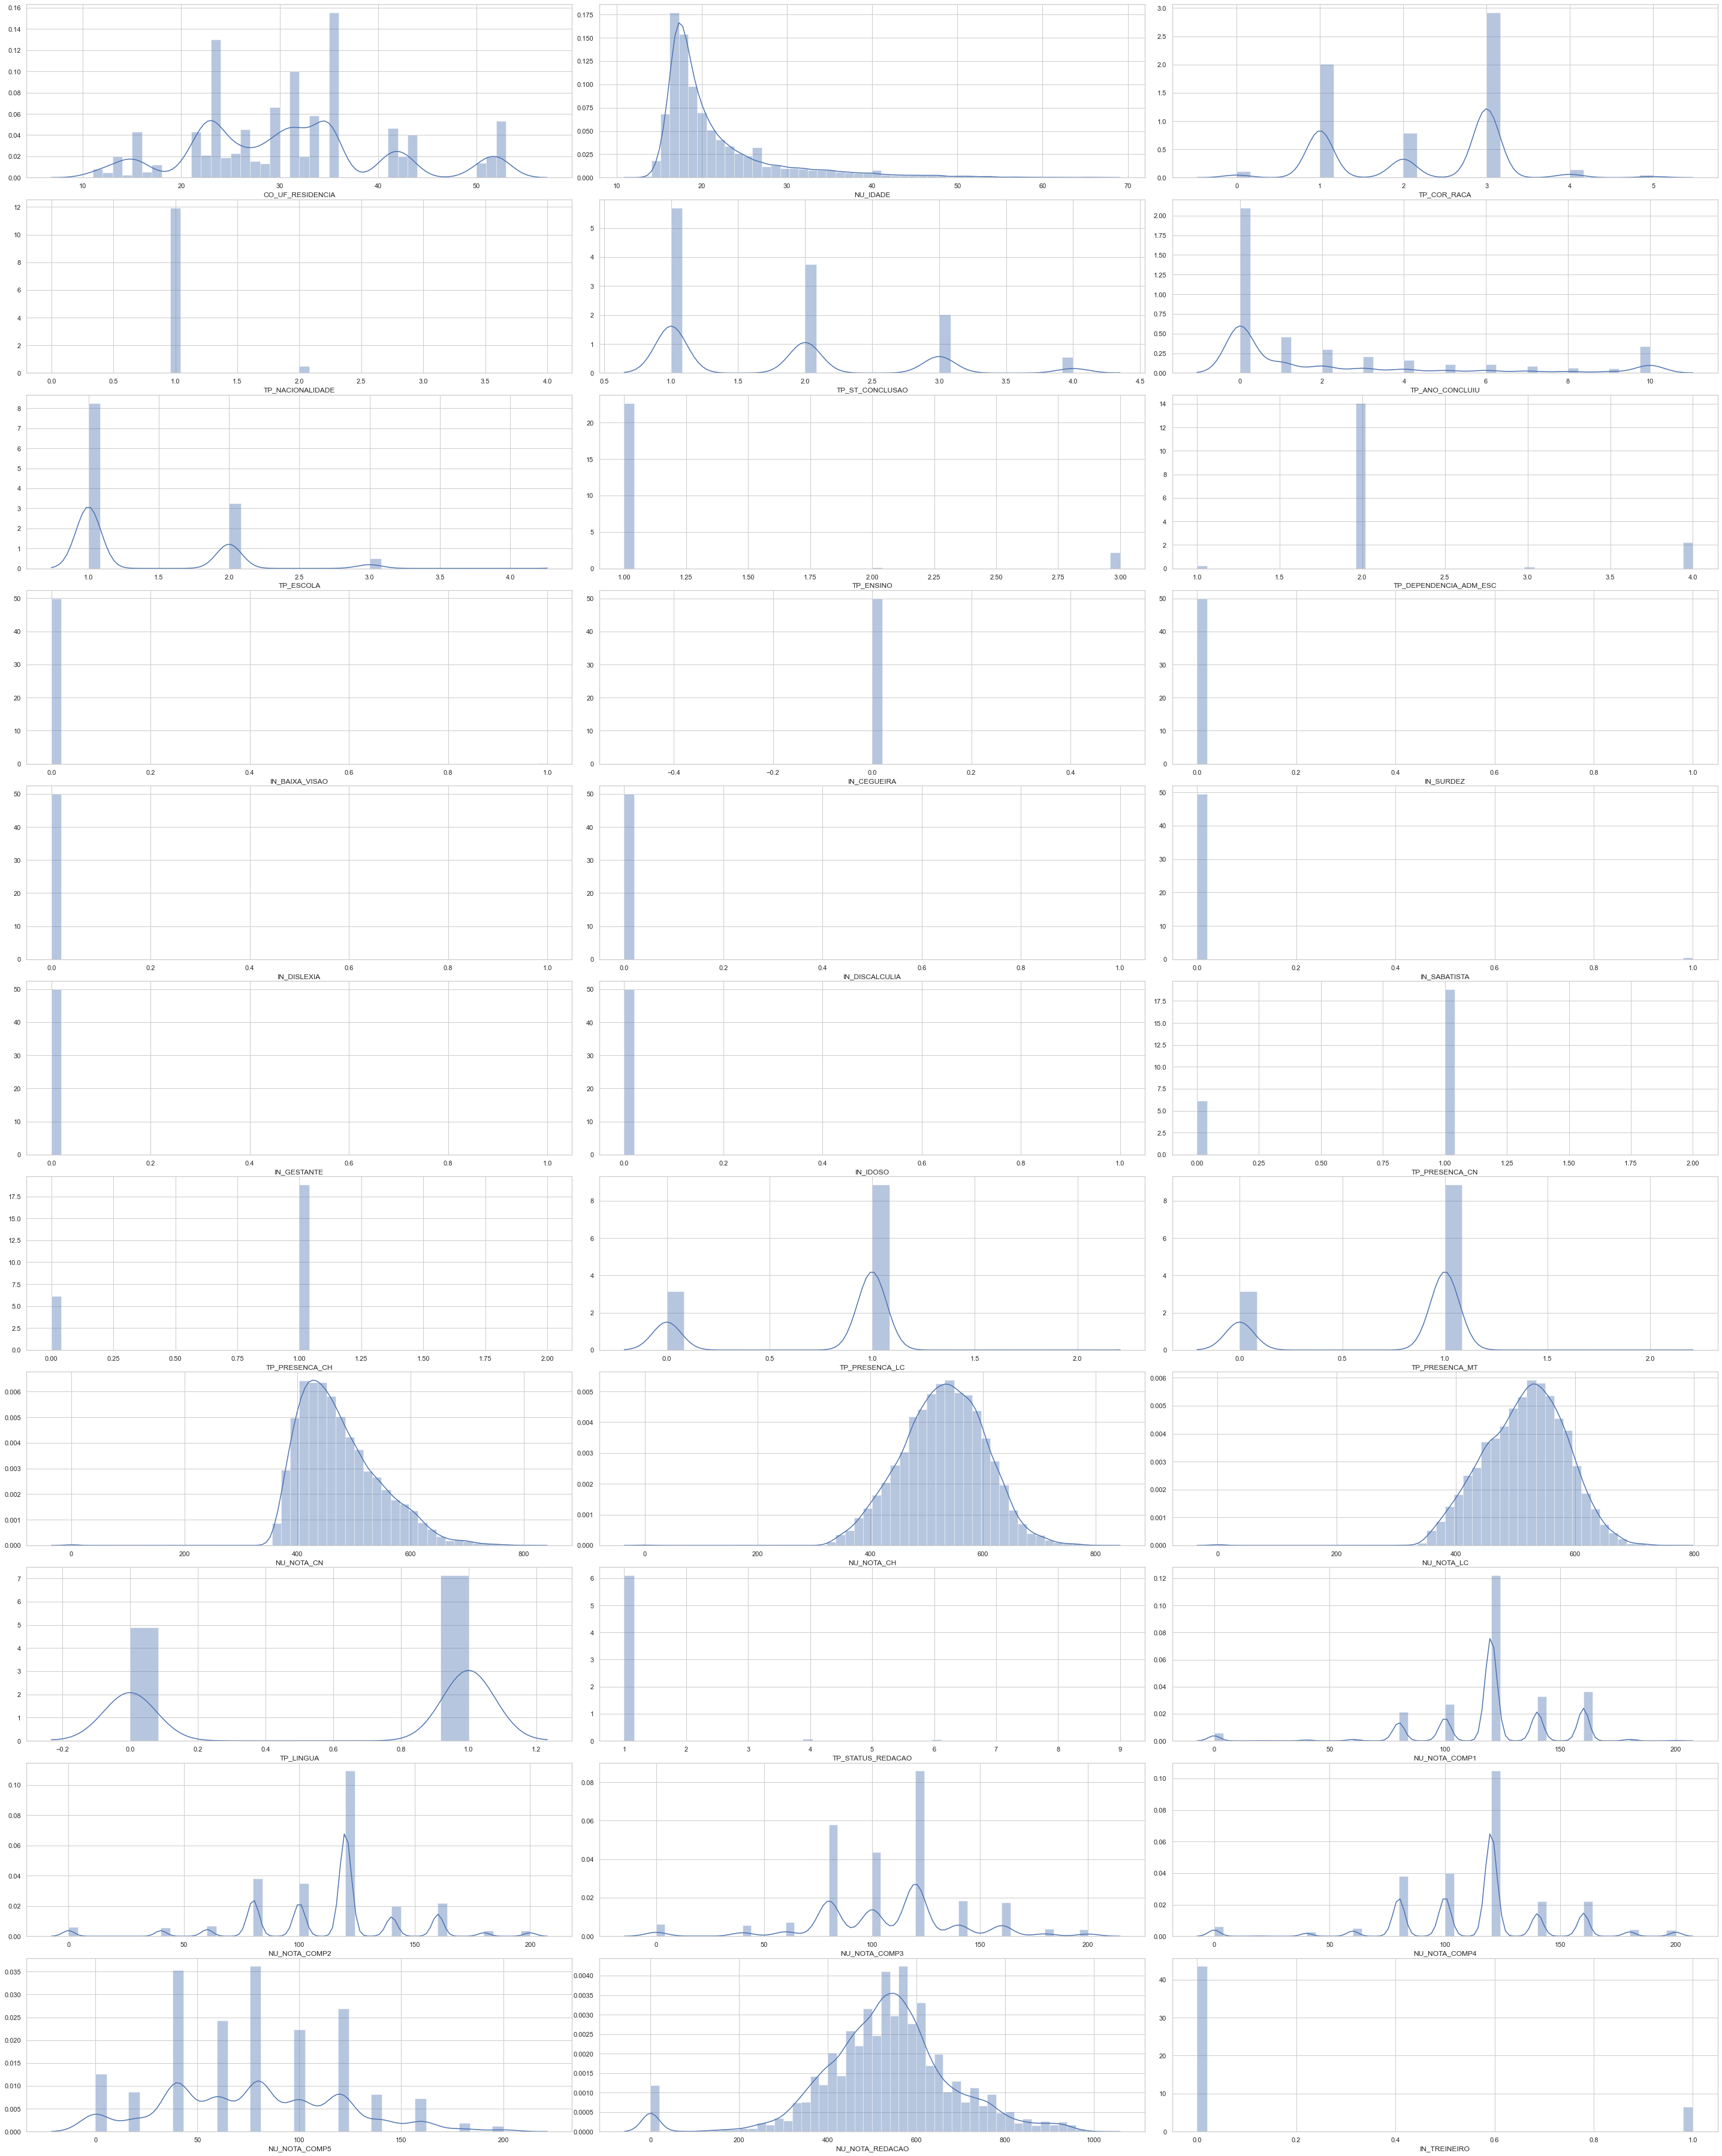

In [16]:
EDA_Codenation(dftrain)

In [78]:
dftrain['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [54]:
dftrainUnderSampling = pd.concat([dftrain.query('IN_TREINEIRO == 1'),dftrain.query('IN_TREINEIRO == 0').sample(n=1783,random_state=42)])

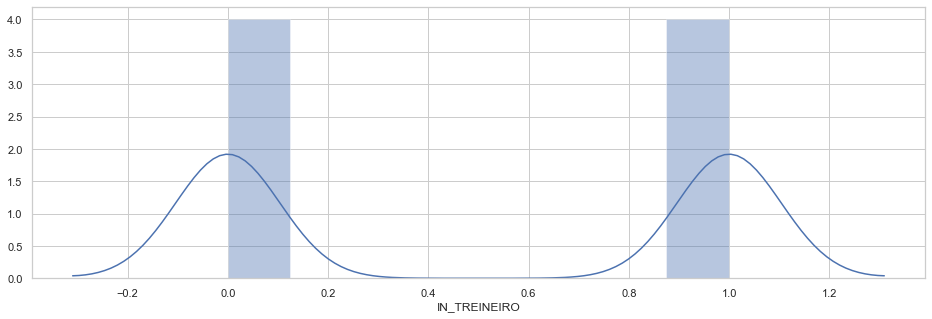

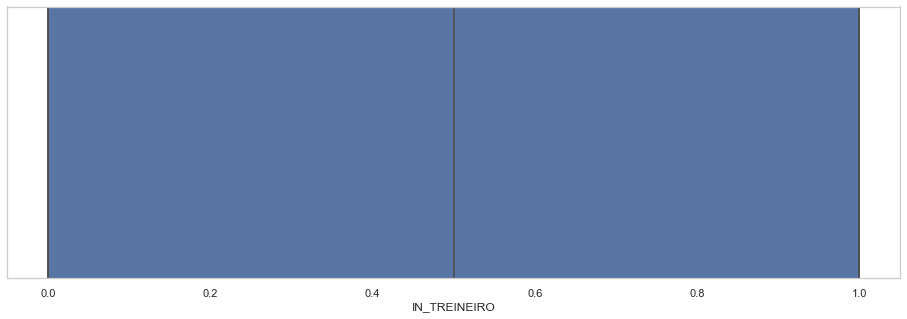

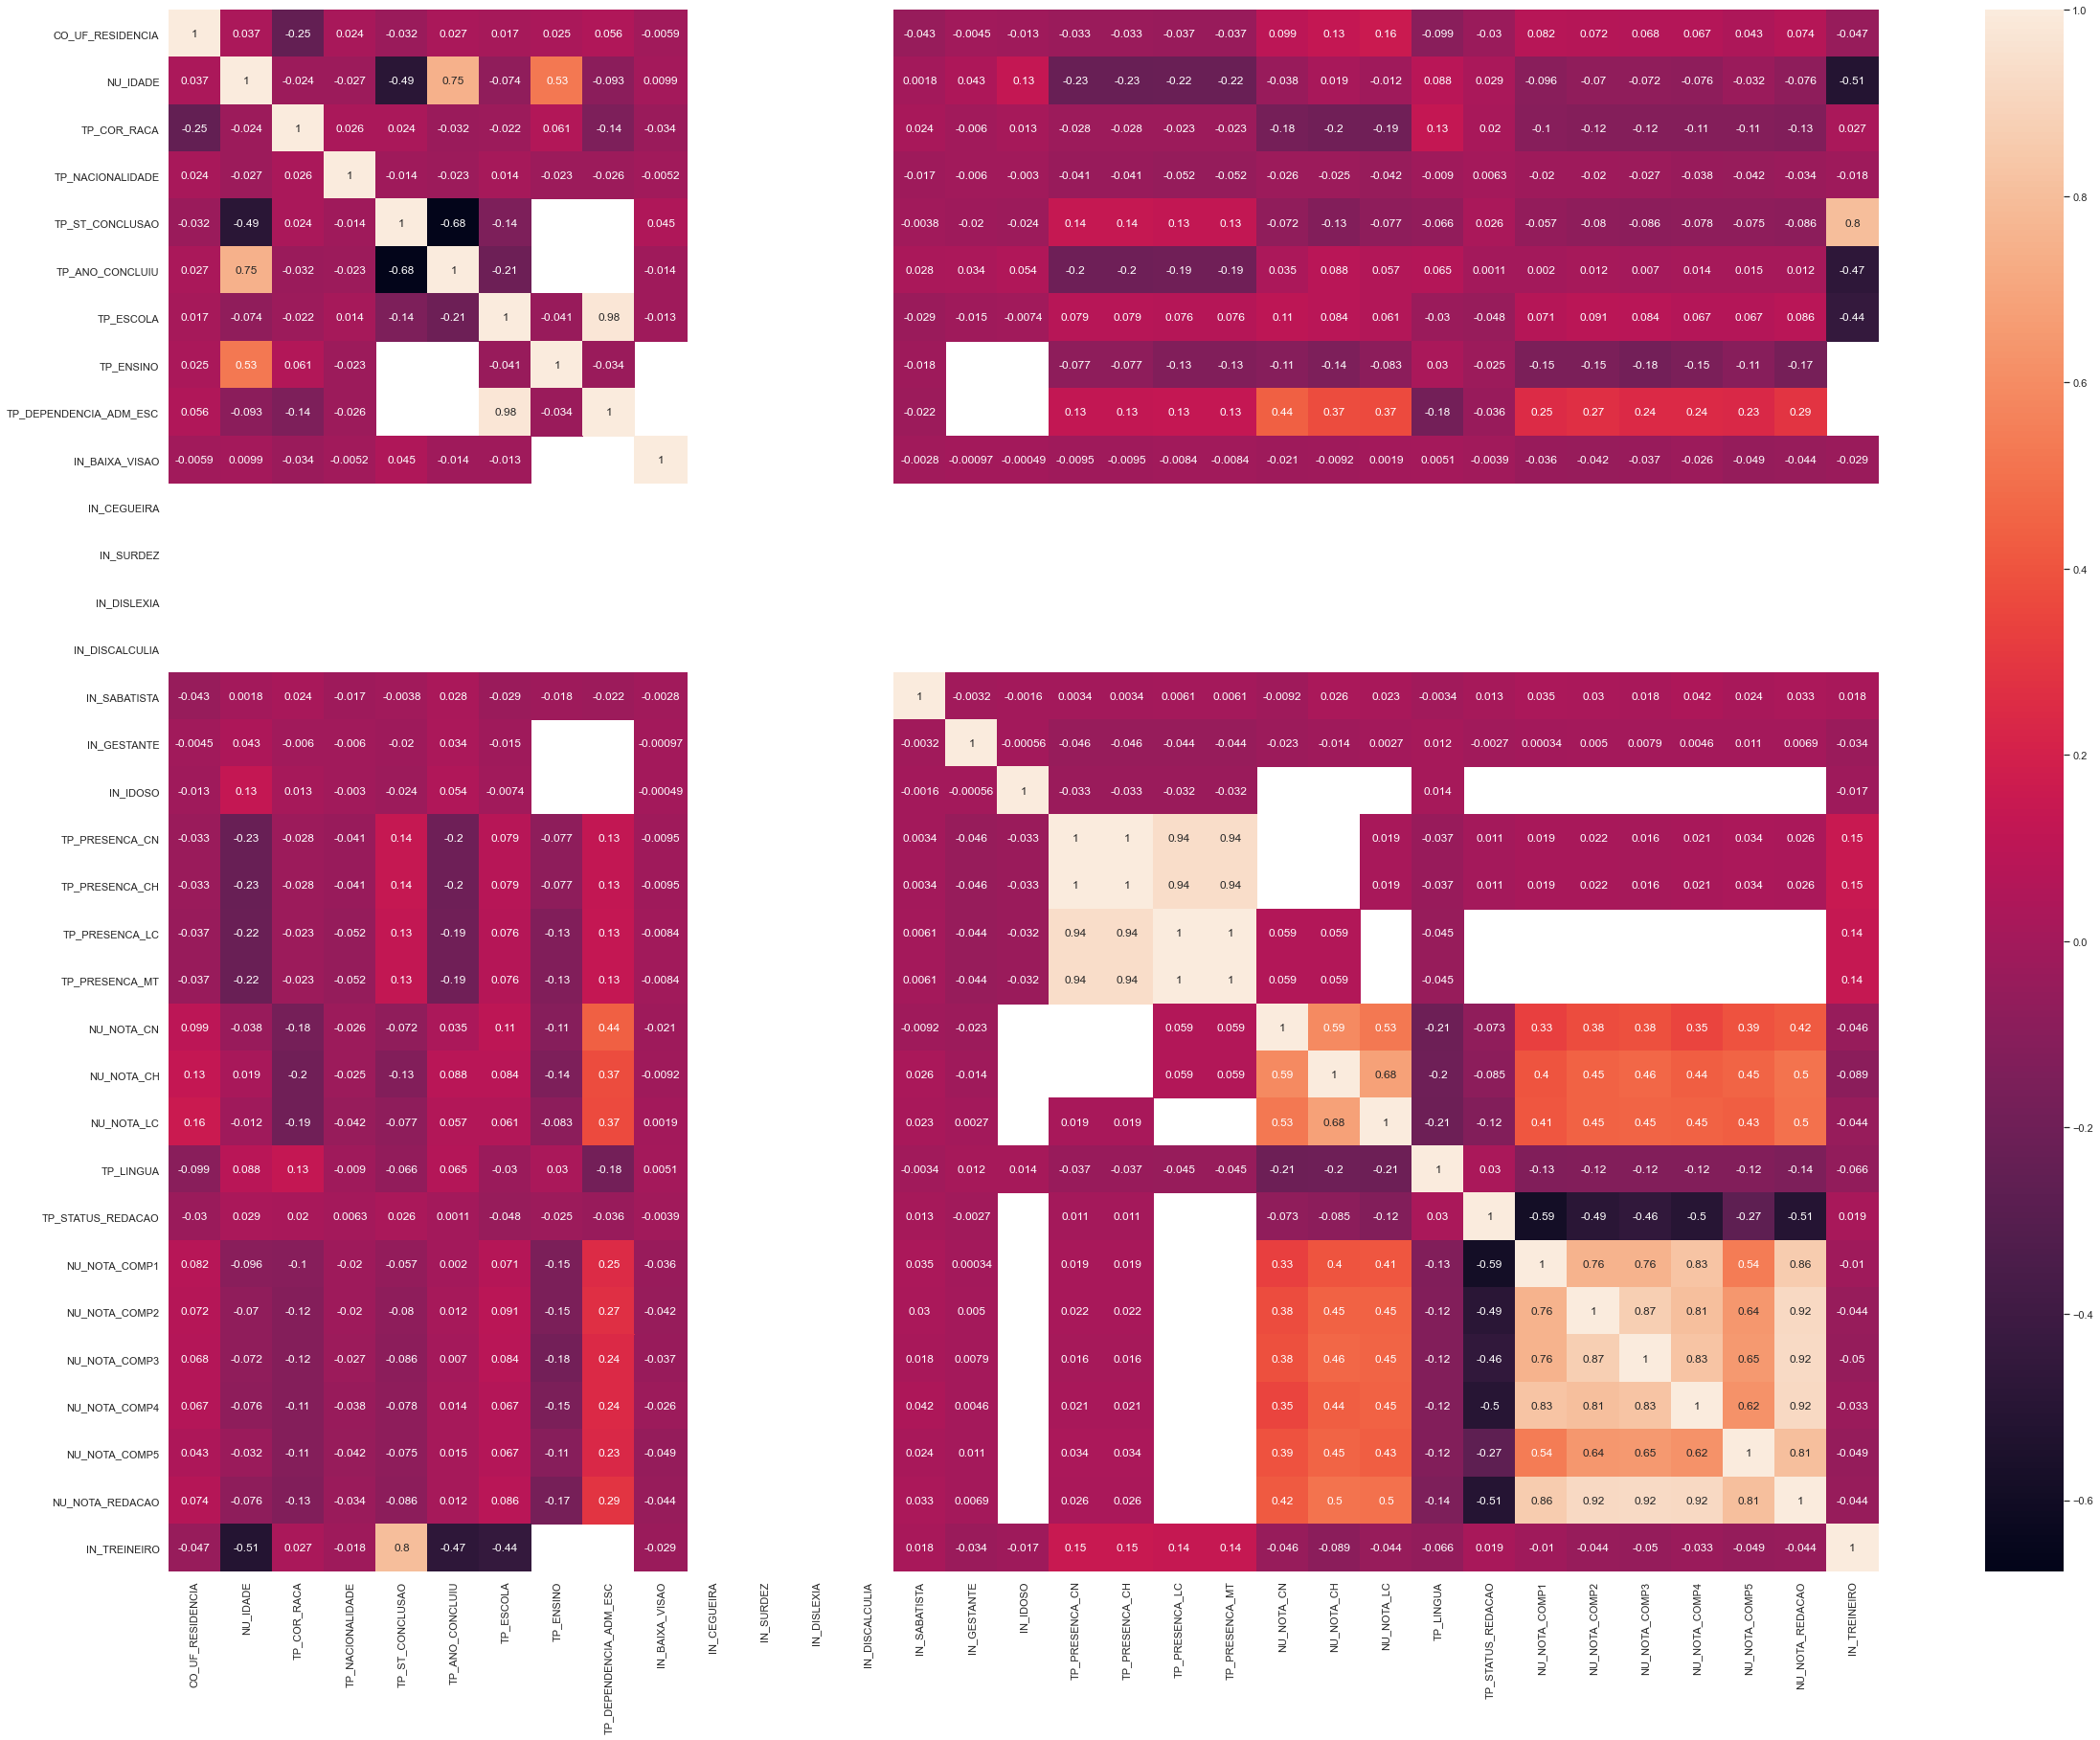

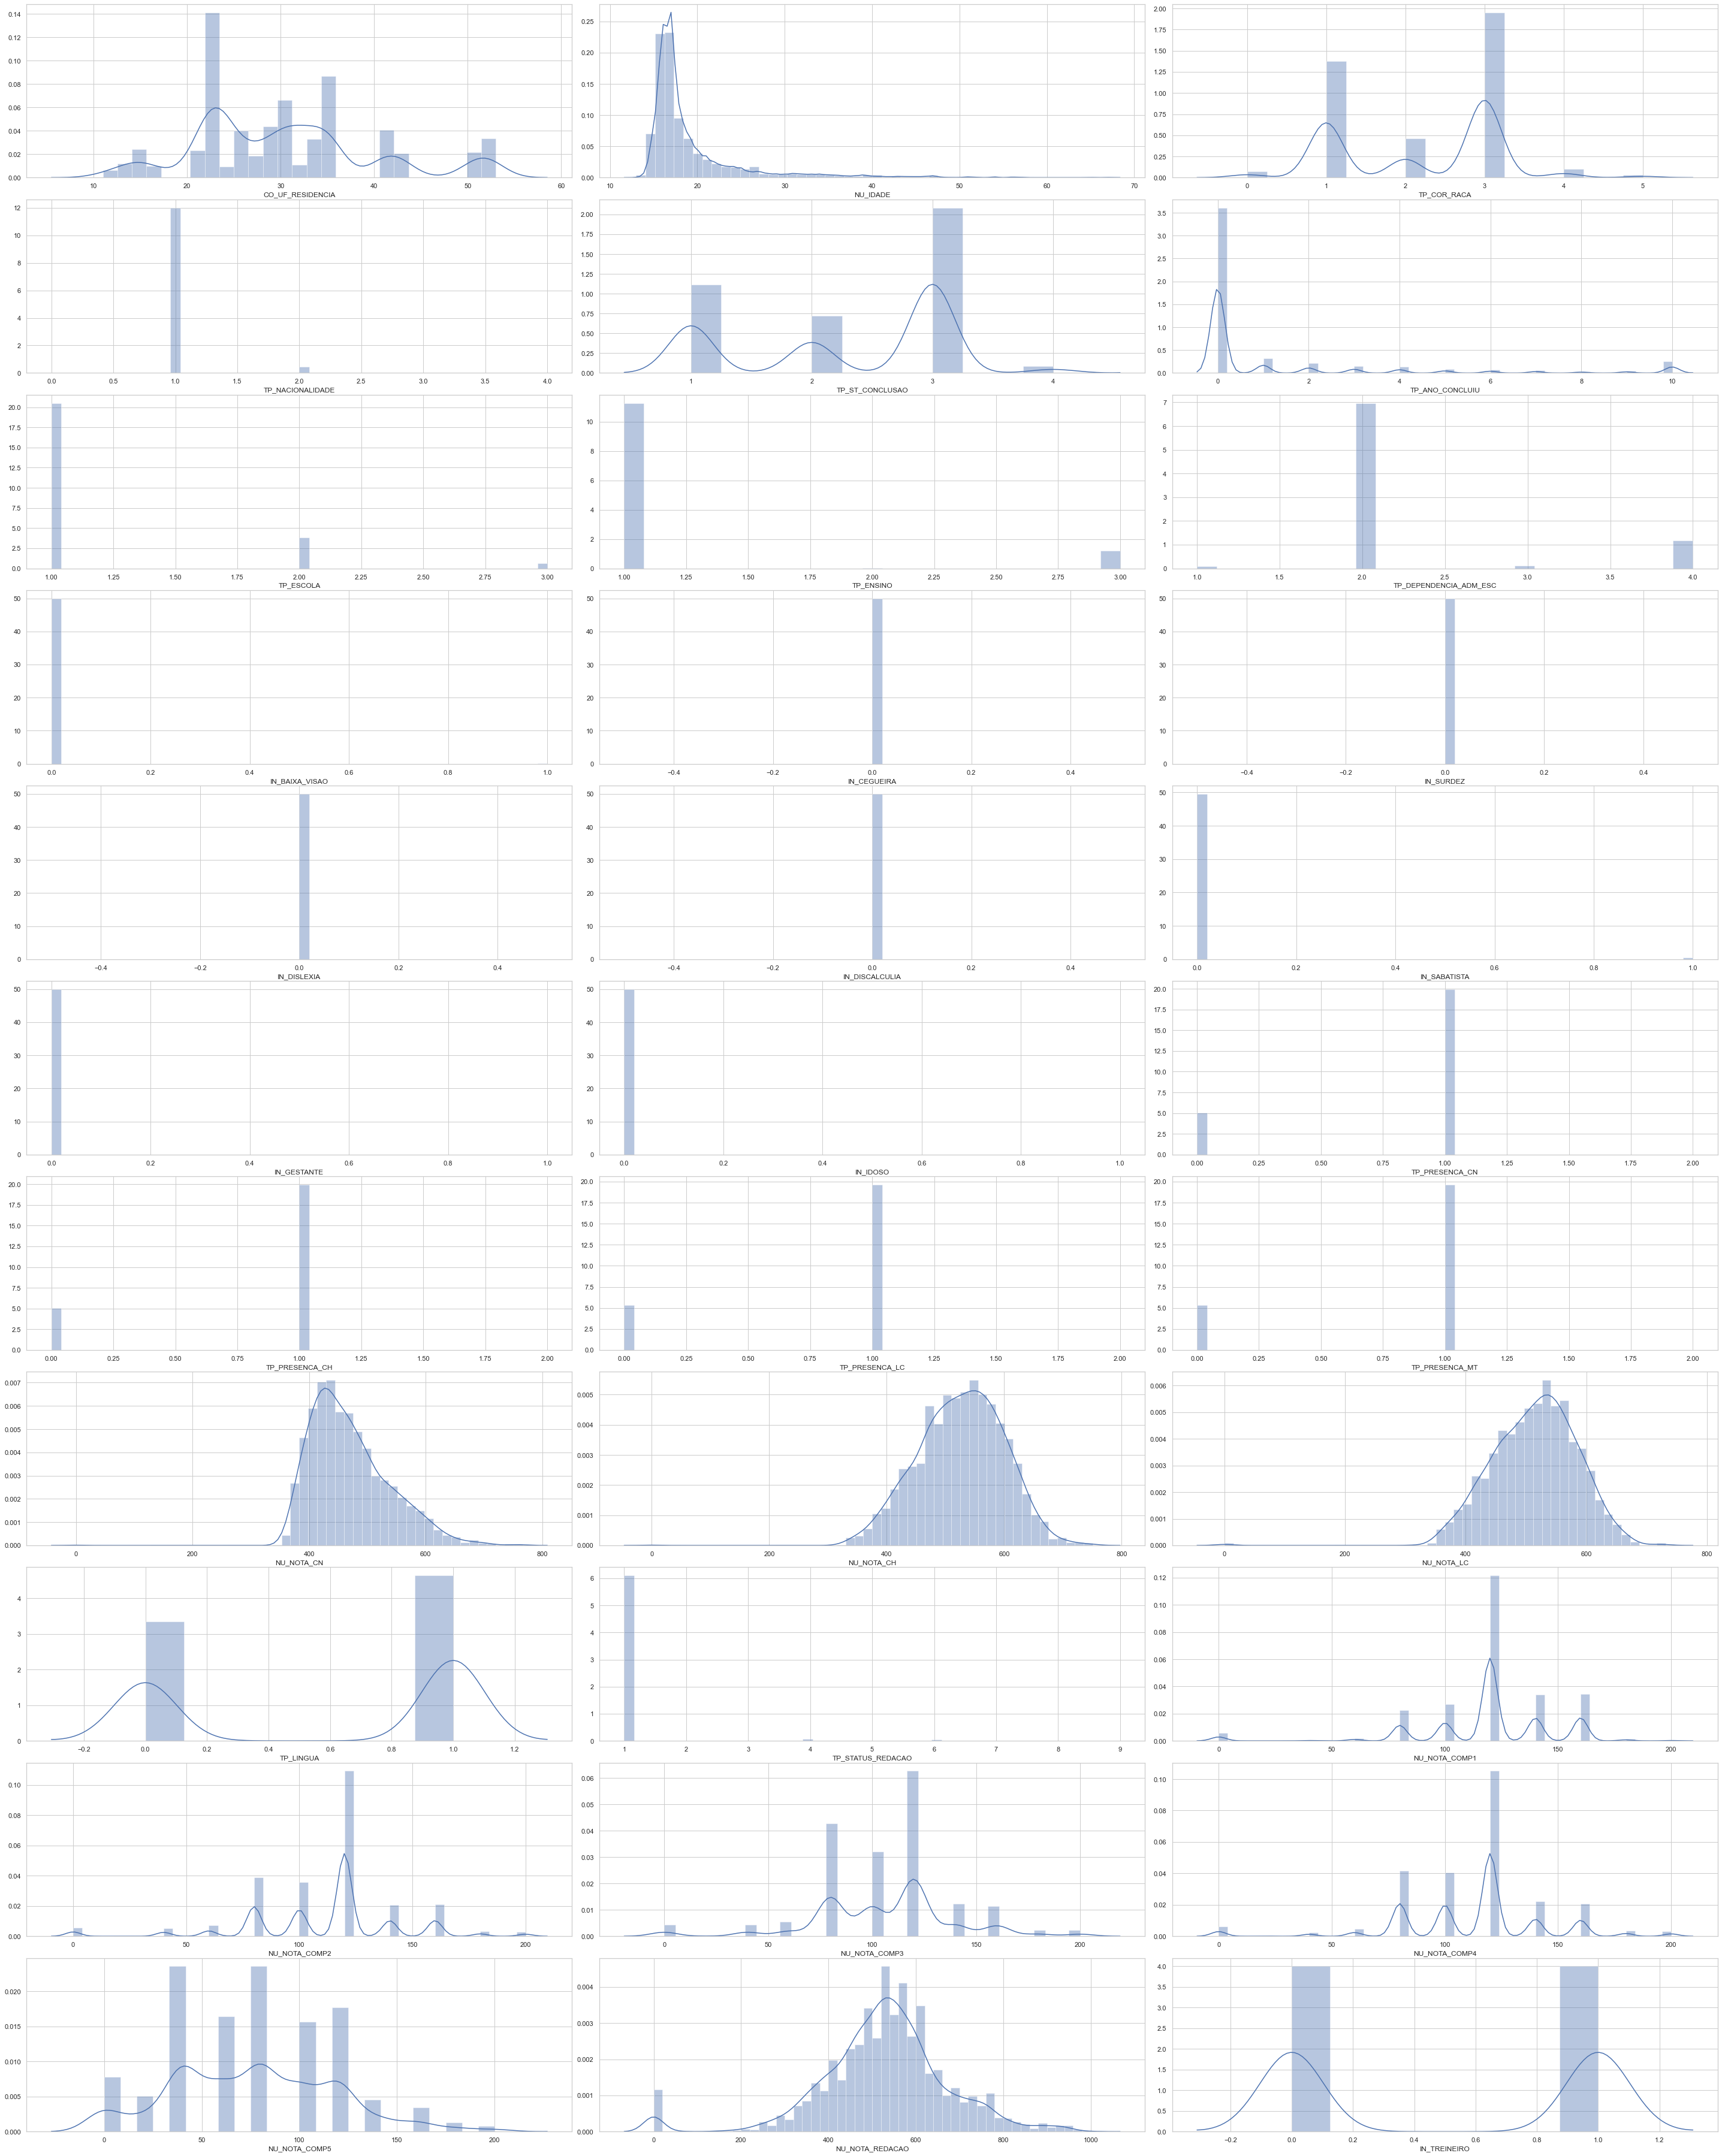

In [44]:
EDA_Codenation(dftrainUnderSampling)

In [79]:
dftrain = DataQualityFunction(dftrain,['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','IN_TREINEIRO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO'])

In [56]:
dftest = DataQualityFunction(dftest,['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO'])

## Feature Selection

In [80]:
featselection = ['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','IN_TREINEIRO']

In [81]:
dftrainFeatSelection = dftrain[featselection]

In [86]:
featselection = ['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA']

In [87]:
dftestFeatSelection = dftest[featselection]

## Aplicando One Hot Encoder

In [74]:
# def OneHotEncoderFunction(dataSet):
#     enc = OneHotEncoder(handle_unknown='ignore')
#     columnsList = list(dftrainFeatSelection.columns)
#     columnsEncoder = [x for x in columnsList if x[0:2] == 'Q0' or x== 'SG_UF_RESIDENCIA']
#     for item in columnsEncoder:
#         enc_df = pd.DataFrame(enc.fit_transform(dataSet[[item]]).toarray())
#         colunasRenomear = {}
#         for itemEncode in enc_df.columns:
#             colunasRenomear[itemEncode] = item +  str(itemEncode)
#             enc_df = enc_df.rename(columns=colunasRenomear)
#         dataSet = dataSet.join(enc_df)
#     return dataSet[dataSet.columns.difference(columnsEncoder)]
       

In [110]:
# dftrainEncoded = OneHotEncoderFunction(dftrainFeatSelection)

In [127]:
# dftestEncoded = OneHotEncoderFunction(dftestFeatSelection)

## Separando dados de Treino e Teste

In [82]:
# Separando PREDITORAS de TARGET
X_preditoras = dftrainFeatSelection.drop('IN_TREINEIRO', axis=1, inplace=False)
Y_target = dftrainFeatSelection['IN_TREINEIRO']

# Separando dados de TREINO e TESTE
Xtrain, Xtest, ytrain, ytest = train_test_split(X_preditoras, Y_target)

## Normalizando Valores

In [83]:
min_max_scaler = MinMaxScaler()
Xtrain = min_max_scaler.fit_transform(Xtrain)  

## Modelo de Regressão Logística

In [84]:
#instaciar modelo
modelLR = LogisticRegression()
modelLR.fit(Xtrain, ytrain)

# Validation
resultado = modelLR.score(Xtest,ytest)

# Print do resultado
msg = "%s | Score: %f" % ('LogisticRegression', resultado)
print(msg)

LogisticRegression | Score: 0.866298


In [92]:
Xtest = min_max_scaler.transform(dftestFeatSelection.values)
ypred = modelLR.predict(Xtest)
dfresult['IN_TREINEIRO'] = ypred

In [94]:
dfresult.to_csv('answer.csv', index=False, header=True)